# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('insurance.csv')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [2]:
data.isnull().values.any()

False

In [3]:
#It is also beneficial to know the proportion distribution of the nominal features such as sex (male/female), smoking condition (yes/no) and living regions in this example. 
#The dataset has contains a pretty belance in proporiton of sex and region, but not in smoking condition. 
#Only about one fifth of the population in this dataset are smokers.

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [4]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [5]:
#A correlation value is between -1 to 1 when a negative indicates reversed relationship and a positive indicates a parallel relationship; a value closer to the extremes indicates a higher correlation. 
#The correlation matrix above depicted relationship of four features in this dataset, 
#while the number at the intersection of each row and column pair is actually indicating a correlation between two features by that row and column.

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [19]:
from sklearn.model_selection import train_test_split
bc_feature_df = data.drop(labels= "charges" , axis = 1)
bc_labels = data["charges"]
X = np.array(bc_feature_df)
y = np.array(bc_labels)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [8]:
data = pd.get_dummies(data, columns=['sex'])
data = pd.get_dummies(data, columns=['smoker'])
data = pd.get_dummies(data, columns=['region'])

In [9]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [16]:
data['sex_female'] = data['sex_female'].astype('float64')
data['sex_male'] = data['sex_male'].astype('float64')
data['smoker_no'] = data['smoker_no'].astype('float64')
data['smoker_yes'] = data['smoker_yes'].astype('float64')
data['region_northeast'] = data['region_northeast'].astype('float64')
data['region_northwest'] = data['region_northwest'].astype('float64')
data['region_southeast'] = data['region_southeast'].astype('float64')
data['region_southwest'] = data['region_southwest'].astype('float64')

In [14]:
data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female          float64
sex_male            float64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
dtype: object

# Question 6 - Train your model.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Shape of  training and test features",X_train.shape,X_test.shape, y_train.shape, y_test.shape)

Shape of  training and test features (1070, 11) (268, 11) (1070,) (268,)


# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [18]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [21]:
from sklearn.metrics import mean_squared_error
y_pred= regression_model.predict(X_test)
mean_squared_error(y_test, y_pred)

35479352.80730363

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7623311844057112

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
Iris = pd.read_csv('Iris.csv')

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\Bhanushree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


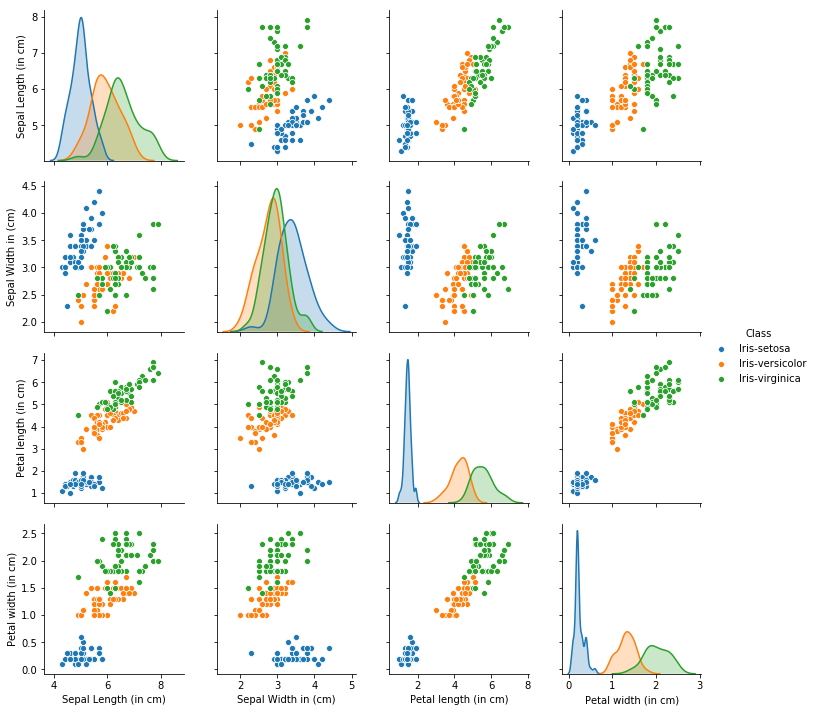

In [38]:
import seaborn as sns
sns.pairplot(Iris,diag_kind='kde', hue='Class')

## Question 11- Do Feature Scaling 

In [39]:
Iris.Class.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

## Question 12- Train and Fit NaiveBayes Model

In [42]:
array = Iris.values
X = array[:,0:4] # select all rows and first 8 columns which are the attributes
Y = array[:,4]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [43]:
from sklearn import metrics
predicted_labels = dt_model.predict(X_test)
metrics.accuracy_score(y_test, predicted_labels)

0.8666666666666667

In [44]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predicted_labels)

array([[12,  0,  0],
       [ 0, 12,  4],
       [ 0,  2, 15]], dtype=int64)

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl.fit(X_train, y_train)

C:\Users\Bhanushree\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [46]:
from sklearn import metrics
predicted_labels = rfcl.predict(X_test)
metrics.accuracy_score(y_test, predicted_labels)

0.8888888888888888

## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [48]:
predicted_labels = gboost.predict(X_test)
metrics.accuracy_score(y_test, predicted_labels)

0.8888888888888888